# Importing the libraries and data

In [2]:
import pandas as pd
import string
import numpy as np
import json
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model


In [3]:
with open('/home/thanos/Desktop/Sustainable_fashion/data/polyvore-dataset/train_no_dup.json') as f:
    data1 = json.load(f)
all_df = pd.DataFrame(data1)

In [4]:
def sum_prices(item_list):
    return sum(item['price'] for item in item_list)

In [5]:
all_df['total_price'] = all_df['items'].apply(sum_prices)


In [6]:
all_df

,name,views,items,image,likes,date,set_url,set_id,desc,total_price
0,Casual,8743,"[{'index': 1, 'name': 'mock neck embroidery su...",http://ak1.polyvoreimg.com/cgi/img-set/cid/214...,394,One month,http://www.polyvore.com/casual/set?id=214181831,214181831,A fashion look from January 2017 by beebeely-l...,640.00
1,Being a Vans shoe model with Luke. Idk about t...,188,"[{'index': 1, 'name': 'nirvana distressed t-sh...",http://ak1.polyvoreimg.com/cgi/img-set/cid/120...,9,Two years,http://www.polyvore.com/being_vans_shoe_model_...,120161271,A fashion look from April 2014 featuring destr...,358.10
2,These Chanel bags is a bad habit .x,562,"[{'index': 1, 'name': 'monki singlet', 'price'...",http://ak1.polyvoreimg.com/cgi/img-set/cid/143...,32,Two years,http://www.polyvore.com/these_chanel_bags_is_b...,143656996,12.19.14,2829.00
3,Avenger/Supernatural prp,2613,"[{'index': 1, 'name': 'tops', 'price': 18.0, '...",http://ak2.polyvoreimg.com/cgi/img-set/cid/186...,88,One year,http://www.polyvore.com/avenger_supernatural_p...,186627934,A fashion look from January 2016 by alyssaclai...,8590.00
4,Boho (39),62,"[{'index': 1, 'name': 'yoins leather sexy v-ne...",http://ak2.polyvoreimg.com/cgi/img-set/cid/206...,3,5 months,http://www.polyvore.com/boho_39/set?id=206969379,206969379,A fashion look from August 2016 by kate-goida ...,680.99
...,...,...,...,...,...,...,...,...,...,...
17311,2.15.17,183,"[{'index': 1, 'name': 'raey deep v-neck silk c...",http://ak1.polyvoreimg.com/cgi/img-set/cid/216...,117,4 days,http://www.polyvore.com/15.17/set?id=216801059,216801059,A fashion look from February 2017 by kianahall...,1456.00
17312,tweed,2428,"[{'index': 1, 'name': 'michael kors printed bo...",http://ak1.polyvoreimg.com/cgi/img-set/cid/190...,382,One year,http://www.polyvore.com/tweed/set?id=190488700,190488700,A fashion look from February 2016 by drigomes ...,4081.00
17313,TV Style: Pretty Little Liars,2184,"[{'index': 1, 'name': 'color block fit flare m...",http://ak2.polyvoreimg.com/cgi/img-set/cid/187...,398,One year,http://www.polyvore.com/tv_style_pretty_little...,187504514,A fashion look from January 2016 by vanjazivad...,440.00
17314,60-Second Style: Work Wear,3147,"[{'index': 1, 'name': 'patchwork fit flare dre...",http://ak2.polyvoreimg.com/cgi/img-set/cid/211...,440,Three months,http://www.polyvore.com/60-second_style_work_w...,211085207,A fashion look from November 2016 by beebeely-...,1745.00


In [7]:
all_df = all_df[["views","total_price",'likes']]

## ############################################ NOTICE #######################################
## Here we create some usefull Neural Networks examples. We use them as our guid fo the others

In [ ]:
## FIRST EXAMPLE
# Classic example where we have a matrix of features we want to pass to our NN. Here We dont use concat
train_df, test_df = train_test_split(all_df, test_size=0.2, random_state=42)

# Prepare input and output data
X_train = train_df[['total_price', 'views']]
y_train = train_df['likes']

X_test = test_df[['total_price', 'views']]
y_test = test_df['likes']

scaler_X = StandardScaler()
scaler_y = StandardScaler()


X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Use the transform method for test data to avoid data leakage
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Create the simple ANN model using Functional API
input_layer = Input(shape=(2,), name='input_layer')
fc1 = Dense(64, activation='relu')(input_layer)
fc2 = Dense(32, activation='relu')(fc1)
fc3 = Dense(16, activation='relu')(fc2)
output_layer = Dense(1, activation='linear')(fc3)

model = Model(inputs=[input_layer], outputs=[output_layer])

model.compile(optimizer= tensorflow.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error')
model.summary()

In [ ]:
## SECOND EXAMPLE
# Example of keras functional API with sub models

# define two sets of inputs
inputA = Input(shape=(32,))
inputB = Input(shape=(128,))
# the first branch operates on the first input
x = Dense(8, activation="relu")(inputA)
x = Dense(4, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)
# the second branch opreates on the second input
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(4, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)
# combine the output of the two branches
combined = Concatenate()([x.output, y.output])
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(2, activation="relu")(combined)
z = Dense(1, activation="linear")(z)
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[x.input, y.input], outputs=z)

In [ ]:
## THIRD EXAMPLE
## Thats a similar approach where you define 2 sub models rather than creating 2 branches and then merge them

train_df, test_df = train_test_split(all_df, test_size=0.2, random_state=42)
X_price_train = train_df[['total_price']]
X_views_train = train_df[['views']]
y_train = train_df['likes']

# Standardize the inputs
scaler_price = StandardScaler()
scaler_views = StandardScaler()
scaler_y = StandardScaler()

X_price_test_scaled = scaler_price.transform(X_price_test)
X_views_test_scaled = scaler_views.transform(X_views_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))



x = Dense(64, activation="relu")(input_price)
x = Dense(32, activation="relu")(x)
x = Dense(4, activation="relu")(x)
x = Model(inputs=input_price, outputs=x)


y = Dense(64, activation="relu")(input_views)
y = Dense(32, activation="relu")(y)
y = Dense(4, activation="relu")(y)
y = Model(inputs=input_views, outputs=y)


combined = Concatenate()([x.output, y.output])


fc1 = Dense(64, activation='relu')(combined)
fc2 = Dense(32, activation='relu')(fc1)
fc3 = Dense(16, activation='relu')(fc2)
output = Dense(1,activation='linear')(fc3)

model = Model(inputs=[input_price, input_views], outputs=[output])

model.compile(optimizer= tensorflow.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error')
model.summary() 

In [ ]:
## FOURTH EXAMPLE
# In this example we define two functions that they create 2 models. One model creates a cnn model with the architecture of a CNN, 
def create_mlp(dim, regress=False):
	# define our MLP network
	model = Sequential()
	model.add(Dense(8, input_dim=dim, activation="relu"))
	model.add(Dense(4, activation="relu"))
	# check to see if the regression node should be added
	if regress:
		model.add(Dense(1, activation="linear"))
	# return our model
	return model

def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
	# initialize the input shape and channel dimension, assuming
	# TensorFlow/channels-last ordering
	inputShape = (height, width, depth)
	chanDim = -1
	# define the model input
	inputs = Input(shape=inputShape)
	# loop over the number of filters
	for (i, f) in enumerate(filters):
		# if this is the first CONV layer then set the input
		# appropriately
		if i == 0:
			x = inputs
		# CONV => RELU => BN => POOL
		x = Conv2D(f, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x)
  	# flatten the volume, then FC => RELU => BN => DROPOUT
	x = Flatten()(x)
	x = Dense(16)(x)
	x = Activation("relu")(x)
	x = BatchNormalization(axis=chanDim)(x)
	x = Dropout(0.5)(x)
	# apply another FC layer, this one to match the number of nodes
	# coming out of the MLP
	x = Dense(4)(x)
	x = Activation("relu")(x)
	# check to see if the regression node should be added
	if regress:
		x = Dense(1, activation="linear")(x)
	# construct the CNN
	model = Model(inputs, x)
	# return the CNN
	return model

In [ ]:
# CONTINUATION OF THE FORTH EXAMPLE
YOUR_IMAGE_WIDTH = 64
YOUR_IMAGE_HEIGHT = 64
YOUR_IMAGE_DEPTH = 3
YOUR_MLP_INPUT_DIM = 10
# Create the CNN and MLP models without the regression output
cnn_model = create_cnn(width=YOUR_IMAGE_WIDTH, height=YOUR_IMAGE_HEIGHT, depth=YOUR_IMAGE_DEPTH, regress=False)
mlp_model = create_mlp(dim=YOUR_MLP_INPUT_DIM, regress=False)

# Create input layers for both models
cnn_input = Input(shape=(YOUR_IMAGE_HEIGHT, YOUR_IMAGE_WIDTH, YOUR_IMAGE_DEPTH), name='cnn_input')
mlp_input = Input(shape=(YOUR_MLP_INPUT_DIM,), name='mlp_input')

# Obtain the outputs of both models given their inputs
cnn_output = cnn_model(cnn_input)
mlp_output = mlp_model(mlp_input)

# Concatenate the outputs
concatenated = Concatenate()([cnn_output, mlp_output])
x = Dense(8, activation="relu")(concatenated)

# Add the final regression layer
final_output = Dense(1, activation="linear")(x)

# Build the full model
modelfinal = Model(inputs=[cnn_input, mlp_input], outputs=final_output)

## We create a multi input keras model that takes two different inputs channels of numerical featurs 

In [10]:
train_df, test_df = train_test_split(all_df, test_size=0.2, random_state=42)


In [11]:
train_df

,views,total_price,likes
16163,37,307.90,26
5386,683,1173.19,156
13805,65,715.00,27
934,495,463.00,13
14007,167,1081.68,71
...,...,...,...
11284,1101,9703.00,291
11964,66,30482.64,3
5390,17,437.00,4
860,137,5080.00,20


In [12]:
# Parsing the train data and the target. the train data are parsed in two different collumns
X_price_train = train_df[['total_price']]
X_views_train = train_df[['views']]
y_train = train_df['likes']

In [13]:
# Parsing the test data
X_price_test = test_df[['total_price']]
X_views_test = test_df[['views']]
y_test = test_df['likes']

In [14]:
# Standardize the inputs, first we create scalers objects
scaler_price = StandardScaler()
scaler_views = StandardScaler()
scaler_y = StandardScaler()

In [15]:
# Scale the data, we have different scalers because we have different data streams, otherwise the X matrix should have one scaler object 
X_price_train_scaled = scaler_price.fit_transform(X_price_train)
X_views_train_scaled = scaler_views.fit_transform(X_views_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

In [16]:
# We transform on the test data only without fitting so we dont have data leakage.
X_price_test_scaled = scaler_price.transform(X_price_test)
X_views_test_scaled = scaler_views.transform(X_views_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [17]:
input_price = Input(shape=(1,), name='input_total_price')
input_views = Input(shape=(1,), name='input_views')


In [25]:
# Define the Neural Network Model with the hidden layer and the activation functions
input_price = Input(shape=(1,), name='input_total_price')
input_views = Input(shape=(1,), name='input_views')
dense1 = Dense(64, activation='relu')(input_price)
dense3 = Dense(32, activation='relu')(dense1)
dense5 = Dense(4, activation='relu')(dense3)
dense2 = Dense(64, activation='relu')(input_views)
dense4 = Dense(32, activation='relu')(dense2)
dense6 = Dense(4, activation='relu')(dense4)

In [26]:
# We concate the branches
concat_layer = Concatenate()([dense5, dense6])


In [27]:
# we stack some layers before the final output
fc1 = Dense(64, activation='relu')(concat_layer)
fc2 = Dense(32, activation='relu')(fc1)
fc3 = Dense(16, activation='relu')(fc2)
output = Dense(1,activation='linear')(fc3)

In [28]:
model = Model(inputs=[input_price, input_views], outputs=[output])
# We compile the model, here we can choose LR , optimizers, and loss function
model.compile(optimizer= tensorflow.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error')
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_total_price (InputLayer)  [(None, 1)]         0           []                               
                                                                                                  
 input_views (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 64)           128         ['input_total_price[0][0]']      
                                                                                                  
 dense_13 (Dense)               (None, 64)           128         ['input_views[0][0]']            
                                                                                            

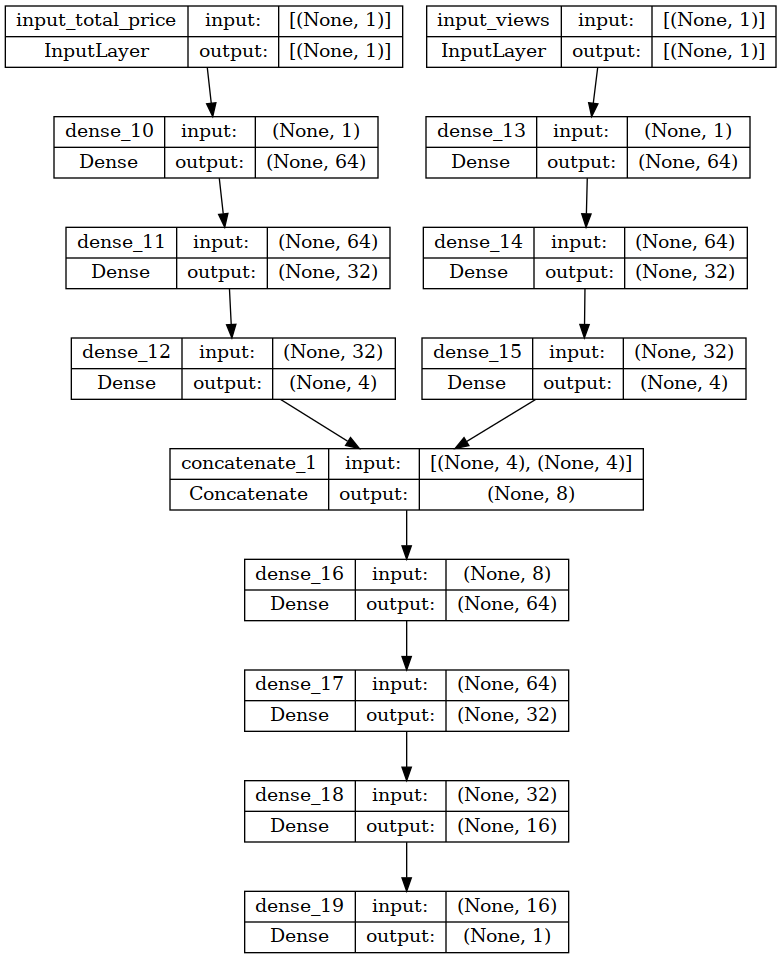

In [44]:
keras.utils.plot_model(model,show_shapes=True)


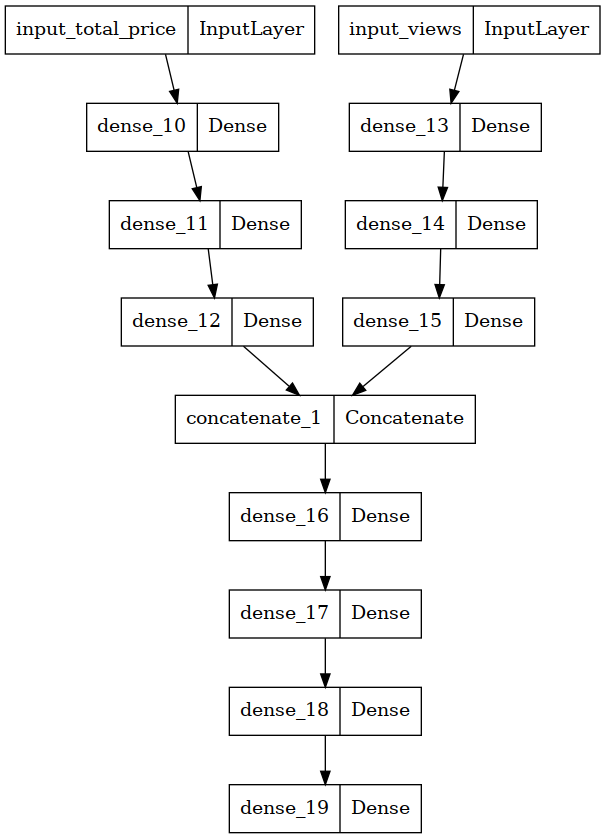

In [45]:
display(plot_model(model))

In [48]:
history = model.fit([X_price_train_scaled, X_views_train_scaled], y_train_scaled, epochs=15, batch_size=2,validation_split=0.1, verbose=True)


Epoch 1/15
6233/6233 [==============================] - 14s 2ms/step - loss: 0.4177 - val_loss: 0.4247
Epoch 2/15
6233/6233 [==============================] - 16s 3ms/step - loss: 0.4177 - val_loss: 0.4197
Epoch 3/15
6233/6233 [==============================] - 16s 3ms/step - loss: 0.4144 - val_loss: 0.4333
Epoch 4/15
6233/6233 [==============================] - 16s 3ms/step - loss: 0.4168 - val_loss: 0.4325
Epoch 5/15
6233/6233 [==============================] - 13s 2ms/step - loss: 0.4158 - val_loss: 0.4336
Epoch 6/15
6233/6233 [==============================] - 13s 2ms/step - loss: 0.4149 - val_loss: 0.4295
Epoch 7/15
6233/6233 [==============================] - 13s 2ms/step - loss: 0.4143 - val_loss: 0.4239
Epoch 8/15
6233/6233 [==============================] - 13s 2ms/step - loss: 0.4154 - val_loss: 0.4191
Epoch 9/15
6233/6233 [==============================] - 19s 3ms/step - loss: 0.4152 - val_loss: 0.4239
Epoch 10/15
6233/6233 [==============================] - 18s 3ms/step - l

In [37]:
model.evaluate([X_price_test_scaled, X_views_test_scaled], y_test_scaled)


109/109 [==============================] - 0s 2ms/step - loss: 0.4560


0.4560351073741913

In [ ]:
y

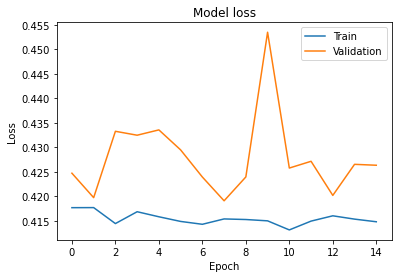

In [49]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [50]:
y_pred_scaled = model.predict([X_price_test_scaled, X_views_test_scaled])

# Inverse transform the scaled prediction to original value
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Create a DataFrame to compare the actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

print(comparison_df)

109/109 [==============================] - 0s 2ms/step
       Actual   Predicted
169       438  517.076721
8878       39   32.849663
10347     440  544.280762
2267       17   34.618797
11306     321  229.162979
...       ...         ...
14939     304  272.528839
2872        9   60.515953
13702     350  478.035004
8888      200  231.904861
16286     539   93.101814

[3464 rows x 2 columns]


## ############################################ NOTICE #######################################
## Here we create some usefull Neural Networks examples. We use them as our guid fo the others

In [ ]:
## FIRST EXAMPLE
# Classic example where we have a matrix of features we want to pass to our NN. Here We dont use concat
train_df, test_df = train_test_split(all_df, test_size=0.2, random_state=42)

# Prepare input and output data
X_train = train_df[['total_price', 'views']]
y_train = train_df['likes']

X_test = test_df[['total_price', 'views']]
y_test = test_df['likes']

scaler_X = StandardScaler()
scaler_y = StandardScaler()


X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Use the transform method for test data to avoid data leakage
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Create the simple ANN model using Functional API
input_layer = Input(shape=(2,), name='input_layer')
fc1 = Dense(64, activation='relu')(input_layer)
fc2 = Dense(32, activation='relu')(fc1)
fc3 = Dense(16, activation='relu')(fc2)
output_layer = Dense(1, activation='linear')(fc3)

model = Model(inputs=[input_layer], outputs=[output_layer])

model.compile(optimizer= tensorflow.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error')
model.summary()

In [ ]:
## SECOND EXAMPLE
# Example of keras functional API with sub models

# define two sets of inputs
inputA = Input(shape=(32,))
inputB = Input(shape=(128,))
# the first branch operates on the first input
x = Dense(8, activation="relu")(inputA)
x = Dense(4, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)
# the second branch opreates on the second input
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(4, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)
# combine the output of the two branches
combined = Concatenate()([x.output, y.output])
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(2, activation="relu")(combined)
z = Dense(1, activation="linear")(z)
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[x.input, y.input], outputs=z)

In [ ]:
## THIRD EXAMPLE
## Thats a similar approach where you define 2 sub models rather than creating 2 branches and then merge them

train_df, test_df = train_test_split(all_df, test_size=0.2, random_state=42)
X_price_train = train_df[['total_price']]
X_views_train = train_df[['views']]
y_train = train_df['likes']

# Standardize the inputs
scaler_price = StandardScaler()
scaler_views = StandardScaler()
scaler_y = StandardScaler()

X_price_test_scaled = scaler_price.transform(X_price_test)
X_views_test_scaled = scaler_views.transform(X_views_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))



x = Dense(64, activation="relu")(input_price)
x = Dense(32, activation="relu")(x)
x = Dense(4, activation="relu")(x)
x = Model(inputs=input_price, outputs=x)


y = Dense(64, activation="relu")(input_views)
y = Dense(32, activation="relu")(y)
y = Dense(4, activation="relu")(y)
y = Model(inputs=input_views, outputs=y)


combined = Concatenate()([x.output, y.output])


fc1 = Dense(64, activation='relu')(combined)
fc2 = Dense(32, activation='relu')(fc1)
fc3 = Dense(16, activation='relu')(fc2)
output = Dense(1,activation='linear')(fc3)

model = Model(inputs=[input_price, input_views], outputs=[output])

model.compile(optimizer= tensorflow.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error')
model.summary() 

## We try to implement the model that takes as input images from different channels

In [ ]:
def prepare_image(fpath):
    # Assuming there's some library or utility named 'images' that provides get_download_stream method
    with images.get_download_stream(fpath) as f:
        data = f.read()

    # Convert byte data to numpy array
    nparr = np.frombuffer(data, np.uint8)

    # Decode byte-form numpy array into an image
    img_np = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

    # Resize the image to 64x64
    img_np = cv2.resize(img_np, (64, 64))

    # Normalize image values to [0, 1]
    img_np = img_np / 255.0

    return img_np

In [ ]:
def prepare_image(fpath):
    with images.get_download_stream(fpath) as f:
        data = f.read()
    nparr = np.fromstring(data, np.uint8)
    img_np = cv2.imdecode(img_np , (64, 64))
    im = im/255
    return im
            

In [8]:
# Define the shape of your input images (height, width, channels)
input_shape = (64, 64, 3)

In [9]:
# Create seven input layers
input1 = Input(shape=input_shape, name="Image1")
input2 = Input(shape=input_shape, name="Image2")
input3 = Input(shape=input_shape, name="Image3")
input4 = Input(shape=input_shape, name="Image4")
input5 = Input(shape=input_shape, name="Image5")
input6 = Input(shape=input_shape, name="Image6")
input7 = Input(shape=input_shape, name="Image7")

In [10]:
fc1 = Dense(128, activation='relu')(input1)
fc2 = Dense(128, activation='relu')(input2)
fc3 = Dense(128, activation='relu')(input3)
fc4 = Dense(128, activation='relu')(input4)
fc5 = Dense(128, activation='relu')(input5)
fc6 = Dense(128, activation='relu')(input6)
fc7 = Dense(128, activation='relu')(input7)

In [11]:
# Concatenate all the fully connected layers' outputs
concatenated = Concatenate()([fc1, fc2, fc3, fc4, fc5, fc6, fc7])

In [12]:
# Additional Fully Connected layer on concatenated outputs
fc_final1 = Dense(128, activation='linear')(concatenated)
fc_final2 = Dense(64, activation='relu')(fc_final1)
fc_final3 = Dense(32, activation='relu')(fc_final2)
fc_final4 = Dense(4, activation='relu')(fc_final3)
output = Dense(1,activation='linear')(fc_final4)

In [13]:
model = Model(inputs=[input1,input2, input3, input4, input5, input6, input7], outputs=output)


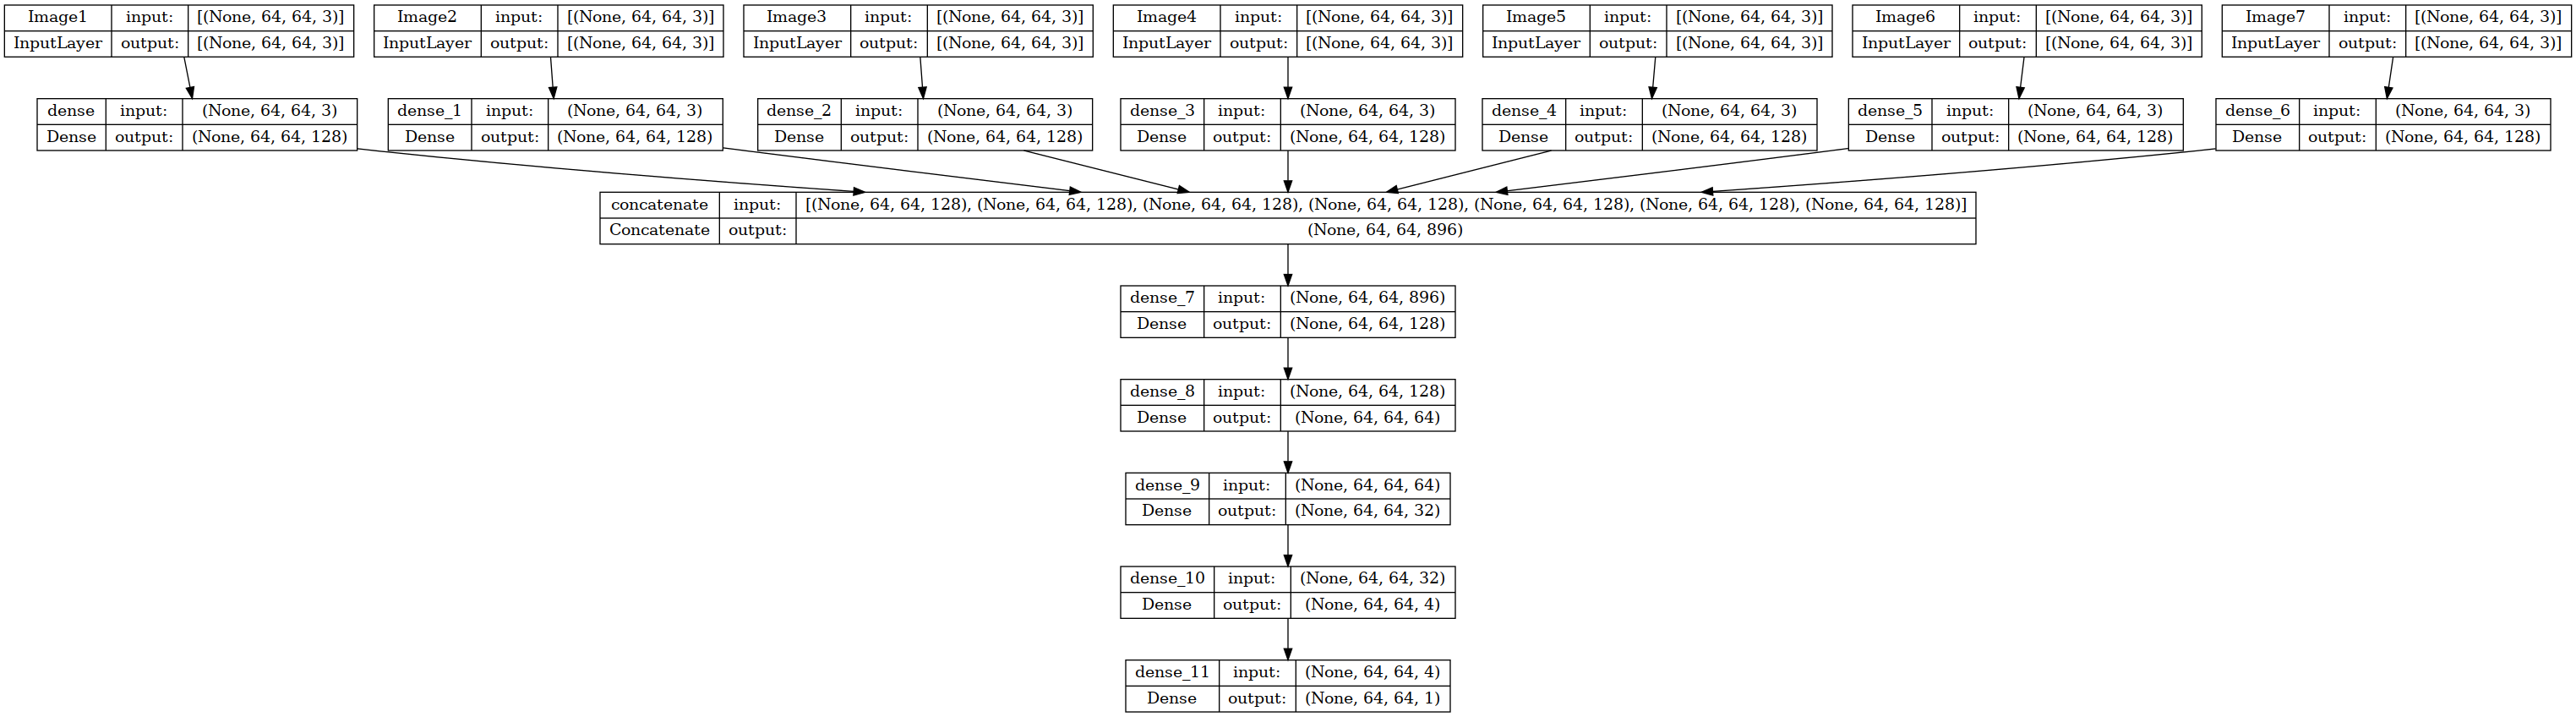

In [14]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)


In [ ]:
# Compile the model 
model.compile(loss='categorical_crossentropy',optimizer='Adam', 
                           metrics=['accuracy'])